## Dependencies 

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np

import gmaps
import requests
# Import the API key.
from config import g_key
from config import password

In [2]:
# Database dependencies
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine

# Database credentials
DATABASES = {
    'finalproject':{
        'POSTGRES_ADDRESS' :'finalproject.c969jxlkzz2v.us-east-2.rds.amazonaws.com',
        'POSTGRES_PORT' : '5432',
        'POSTGRES_USERNAME' : "postgres",
        'POSTGRES_PASSWORD' : password,
        'POSTGRES_DBNAME' : 'housingdata',
    },
}

# Choose the database to use
db = DATABASES['finalproject']

# Connect to postgres
postgres_str = ('postgresql+psycopg2://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username= db['POSTGRES_USERNAME'],
                      password= db['POSTGRES_PASSWORD'],
                      ipaddress= db['POSTGRES_ADDRESS'],
                      port= db['POSTGRES_PORT'],
                      dbname= db['POSTGRES_DBNAME'])
               )

# Create an database engine instance
connection = create_engine(postgres_str)

## Load the datasets

In [3]:
df = pd.read_sql_table('final_table', connection)
df.head()

,city,zhvi,total_pop,med_income,med_age,male,female,race_w,race_aa,race_nat,...,murder_mansl,rape,robbery,agg_assault,burglary,lar_theft,car_theft,arson,lat,long
0,Ladd,86540.17,1185.0,65972.0,42.9,587.0,598.0,1133.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,41.382535,-89.218975
1,Lake Bluff,459437.17,10003.0,107039.0,42.7,4642.0,5361.0,8616.0,151.0,62.0,...,0.0,0.0,1.0,0.0,7.0,36.0,0.0,0.0,42.278912,-87.834236
2,Lake Forest,808297.42,21131.0,171913.0,46.6,10472.0,10659.0,18890.0,520.0,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.258634,-87.840625
3,Lake Villa,208693.58,35286.0,96024.0,40.3,17646.0,17640.0,32294.0,900.0,131.0,...,1.0,4.0,0.0,4.0,3.0,29.0,1.0,0.0,42.416965,-88.073971
4,Lake Zurich,429947.17,42637.0,135146.0,42.0,21299.0,21338.0,36357.0,1008.0,145.0,...,0.0,1.0,1.0,3.0,18.0,238.0,3.0,0.0,42.196969,-88.093411


In [4]:
df.to_csv('housing.csv')

In [5]:
clean_df = df.drop(['city','lat','long', 'male','female', 'eth_nonhisp','murder_mansl', 'robbery','arson','rape', 'car_theft','rape','burglary'],1)
clean_df.head()

,zhvi,total_pop,med_income,med_age,race_w,race_aa,race_nat,race_as,race_api,race_oth,eth_hisp,agg_assault,lar_theft
0,86540.17,1185.0,65972.0,42.9,1133.0,0.0,0.0,7.0,0.0,49.0,83.0,3.0,2.0
1,459437.17,10003.0,107039.0,42.7,8616.0,151.0,62.0,1207.0,0.0,129.0,762.0,0.0,36.0
2,808297.42,21131.0,171913.0,46.6,18890.0,520.0,94.0,1836.0,7.0,142.0,1013.0,0.0,0.0
3,208693.58,35286.0,96024.0,40.3,32294.0,900.0,131.0,1733.0,17.0,858.0,3137.0,4.0,29.0
4,429947.17,42637.0,135146.0,42.0,36357.0,1008.0,145.0,5008.0,124.0,868.0,3441.0,3.0,238.0


In [6]:
clean_df.describe()

,zhvi,total_pop,med_income,med_age,race_w,race_aa,race_nat,race_as,race_api,race_oth,eth_hisp,agg_assault,lar_theft
count,9.790000e+02,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.00000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,1.374120e+05,7628.810429,62588.514917,42.351034,6170.608401,772.398683,53.678888,422.29714,8.344211,385.104208,1054.550669,25.935649,149.924413
std,1.178790e+05,11587.889998,21145.745980,5.858168,8906.665564,2649.138961,103.762227,1262.54303,24.359187,1965.207884,3744.702529,493.154123,2084.391414
min,1.852242e+04,58.000000,16023.000000,21.500000,58.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.388796e+04,819.500000,49696.000000,38.650000,792.000000,1.000000,0.000000,0.00000,0.000000,0.000000,7.000000,0.000000,0.000000
50%,9.960942e+04,1995.000000,58289.000000,42.000000,1918.000000,22.000000,9.000000,11.00000,0.000000,8.000000,39.000000,0.000000,0.000000
75%,1.601418e+05,9741.500000,70160.000000,45.700000,7515.500000,242.500000,51.500000,121.00000,2.000000,116.000000,481.000000,4.000000,31.500000
max,1.360530e+06,83147.000000,212750.000000,63.500000,49654.000000,30695.000000,734.000000,9528.50000,256.000000,47835.000000,74180.000000,15312.000000,64695.000000


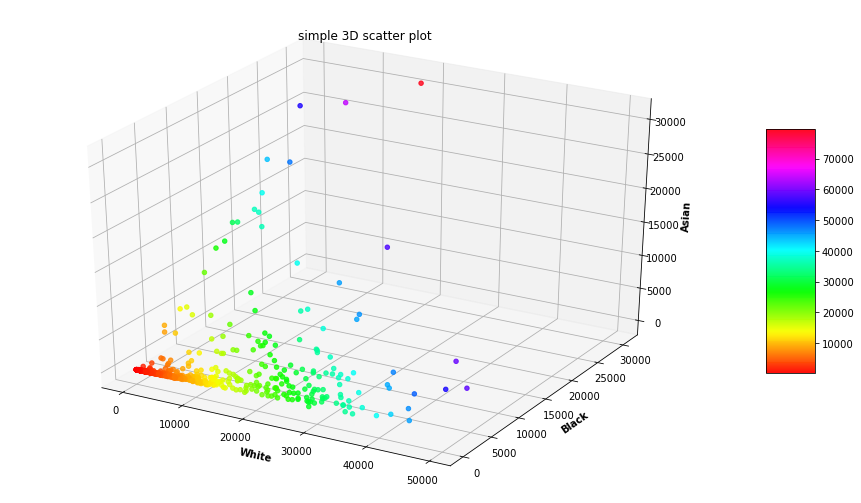

In [7]:
# Creating dataset
x = df['race_w']
y = df['race_aa']
z = df['race_aa']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
#Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='o')
plt.title("simple 3D scatter plot")
ax.set_xlabel("White", fontweight ='bold')
ax.set_ylabel("Black", fontweight ='bold')
ax.set_zlabel("Asian",fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [8]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [65]:
# Ask the customer to add a minimum and maximum temperature value
min_house_price = float(input("What is the minimum house price you would like to pay? "))
max_house_price = float(input("What is the maximum house price you would like to pay? "))

What is the minimum house price you would like to pay? 1000000
What is the maximum house price you would like to pay? 2000000


In [66]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = df.loc[(df["zhvi"] <= max_house_price) & \
                                      (df["zhvi"] >= min_house_price)]
preferred_cities_df.head(10)

,city,zhvi,total_pop,med_income,med_age,male,female,race_w,race_aa,race_nat,...,murder_mansl,rape,robbery,agg_assault,burglary,lar_theft,car_theft,arson,lat,long
627,Glencoe,1037845.67,8477.0,209821.0,45.1,4196.0,4281.0,7993.0,162.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.135027,-87.758119
788,Winnetka,1125064.83,19441.0,174966.0,42.9,9433.0,10008.0,18096.0,111.0,80.0,...,0.0,2.0,0.0,1.0,15.0,85.0,8.0,0.0,42.108083,-87.735895
909,Kenilworth,1360529.67,2512.0,212750.0,41.3,1273.0,1239.0,2367.0,31.0,20.0,...,0.0,0.0,0.0,0.0,5.0,7.0,3.0,0.0,42.085862,-87.717561


In [67]:
city_info = preferred_cities_df[["city", "zhvi", "total_pop",'med_age','eth_hisp','eth_nonhisp','lar_theft', "lat", "long"]].copy()
# hotel_df["Hotel Name"] = ""
city_info.head(10)

,city,zhvi,total_pop,med_age,eth_hisp,eth_nonhisp,lar_theft,lat,long
627,Glencoe,1037845.67,8477.0,45.1,456.0,8021.0,0.0,42.135027,-87.758119
788,Winnetka,1125064.83,19441.0,42.9,1134.0,18307.0,85.0,42.108083,-87.735895
909,Kenilworth,1360529.67,2512.0,41.3,71.0,2441.0,7.0,42.085862,-87.717561


In [68]:
# Add a heatmap of temperature for the vacation spots.
locations = city_info[["lat", "long"]]
price = city_info["zhvi"]
fig = gmaps.figure(center=(40.0, -88.5), zoom_level=6)
heat_layer = gmaps.heatmap_layer(locations, dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [69]:
info_box_template ="""
<dl>
<dt>city</dt><dd>{city}</dd>
<dt>zhvi</dt><dd>{zhvi}</dd>
<dt>total_pop</dt><dd>{total_pop}</dd>
<dt>med_age</dt><dd>{med_age}</dd>
<dt>lar_theft</dt><dd>{lar_theft}</dd>
</dl>
"""

# Store the DataFrame Row.
info = [info_box_template.format(**row) for index, row in city_info.iterrows()]



In [70]:
# Add a heatmap of temperature for the vacation spots.
locations = city_info[["lat", "long"]]
price = city_info["zhvi"]
fig = gmaps.figure(center=(40.0, -88.5), zoom_level=6)
heat_layer = gmaps.heatmap_layer(locations, dissipating=False,
             max_intensity=100, point_radius=2)
marker_layer = gmaps.marker_layer(locations, info_box_content=info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))